# Temperature Forecast Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings 
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/Users/tabrezkhan/Downloads/temperature.csv')

In [3]:
df.head()

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [4]:
df.shape

(7752, 25)

In [5]:
df.isnull().sum()

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
dtype: int64

We can see there are missing values present in our dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7752 entries, 0 to 7751
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   station           7750 non-null   float64
 1   Date              7750 non-null   object 
 2   Present_Tmax      7682 non-null   float64
 3   Present_Tmin      7682 non-null   float64
 4   LDAPS_RHmin       7677 non-null   float64
 5   LDAPS_RHmax       7677 non-null   float64
 6   LDAPS_Tmax_lapse  7677 non-null   float64
 7   LDAPS_Tmin_lapse  7677 non-null   float64
 8   LDAPS_WS          7677 non-null   float64
 9   LDAPS_LH          7677 non-null   float64
 10  LDAPS_CC1         7677 non-null   float64
 11  LDAPS_CC2         7677 non-null   float64
 12  LDAPS_CC3         7677 non-null   float64
 13  LDAPS_CC4         7677 non-null   float64
 14  LDAPS_PPT1        7677 non-null   float64
 15  LDAPS_PPT2        7677 non-null   float64
 16  LDAPS_PPT3        7677 non-null   float64


Using the 'info' method we can see that there is only 1 column with object datatype and remaining 24 columns have float datatype values in them. The column which shows object datatype is actually for "Date" and we will have to treat it and convert it into numerical format.

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
station,7750.0,13.000000,7.211568,1.000000,7.000000,13.000000,19.000000,25.000000
Present_Tmax,7682.0,29.768211,2.969999,20.000000,27.800000,29.900000,32.000000,37.600000
Present_Tmin,7682.0,23.225059,2.413961,11.300000,21.700000,23.400000,24.900000,29.900000
LDAPS_RHmin,7677.0,56.759372,14.668111,19.794666,45.963543,55.039024,67.190056,98.524734
LDAPS_RHmax,7677.0,88.374804,7.192004,58.936283,84.222862,89.793480,93.743629,100.000153
LDAPS_Tmax_lapse,7677.0,29.613447,2.947191,17.624954,27.673499,29.703426,31.710450,38.542255
LDAPS_Tmin_lapse,7677.0,23.512589,2.345347,14.272646,22.089739,23.760199,25.152909,29.619342
LDAPS_WS,7677.0,7.097875,2.183836,2.882580,5.678705,6.547470,8.032276,21.857621
LDAPS_LH,7677.0,62.505019,33.730589,-13.603212,37.266753,56.865482,84.223616,213.414006
LDAPS_CC1,7677.0,0.368774,0.262458,0.000000,0.146654,0.315697,0.575489,0.967277


Using the describe method to check the numerical data details. Almost all the columns in our dataset has numerical values in them and it looks like the count, mean, standard deviation, minimum value, 25% quartile, 50% quartile, 75% quartile and maximum value are all properly distributed in terms of data points. 

As station and Date are unique and will not contribute to the output thus dropping them

In [8]:
df1=df.drop("station",axis=1)
at=df1.drop("Date",axis=1)

To remove the null values, replacing the null values with mean of the coumn as the data type is float

Dealing with dates to change them.

In [9]:
df['Date'] = pd.to_datetime(df.Date)

In [10]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [11]:
df.drop('Date', inplace = True, axis = 1)

In [12]:
df

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Year,Month,Day
0,1.0,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,0.233947,...,37.6046,126.991,212.3350,2.785000,5992.895996,29.1,21.2,2013.0,6.0,30.0
1,2.0,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,0.225508,...,37.6046,127.032,44.7624,0.514100,5869.312500,30.5,22.5,2013.0,6.0,30.0
2,3.0,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,0.209344,...,37.5776,127.058,33.3068,0.266100,5863.555664,31.1,23.9,2013.0,6.0,30.0
3,4.0,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,0.216372,...,37.6450,127.022,45.7160,2.534800,5856.964844,31.7,24.3,2013.0,6.0,30.0
4,5.0,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,0.151407,...,37.5507,127.135,35.0380,0.505500,5859.552246,31.2,22.5,2013.0,6.0,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7747,23.0,23.3,17.1,26.741310,78.869858,26.352081,18.775678,6.148918,72.058294,0.030034,...,37.5372,126.891,15.5876,0.155400,4443.313965,28.3,18.1,2017.0,8.0,30.0
7748,24.0,23.3,17.7,24.040634,77.294975,27.010193,18.733519,6.542819,47.241457,0.035874,...,37.5237,126.909,17.2956,0.222300,4438.373535,28.6,18.8,2017.0,8.0,30.0
7749,25.0,23.2,17.4,22.933014,77.243744,27.939516,18.522965,7.289264,9.090034,0.048954,...,37.5237,126.970,19.5844,0.271300,4451.345215,27.8,17.4,2017.0,8.0,30.0
7750,NaN,20.0,11.3,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,37.4562,126.826,12.3700,0.098475,4329.520508,17.4,11.3,NaN,NaN,NaN


Treating the null values now

<AxesSubplot:>

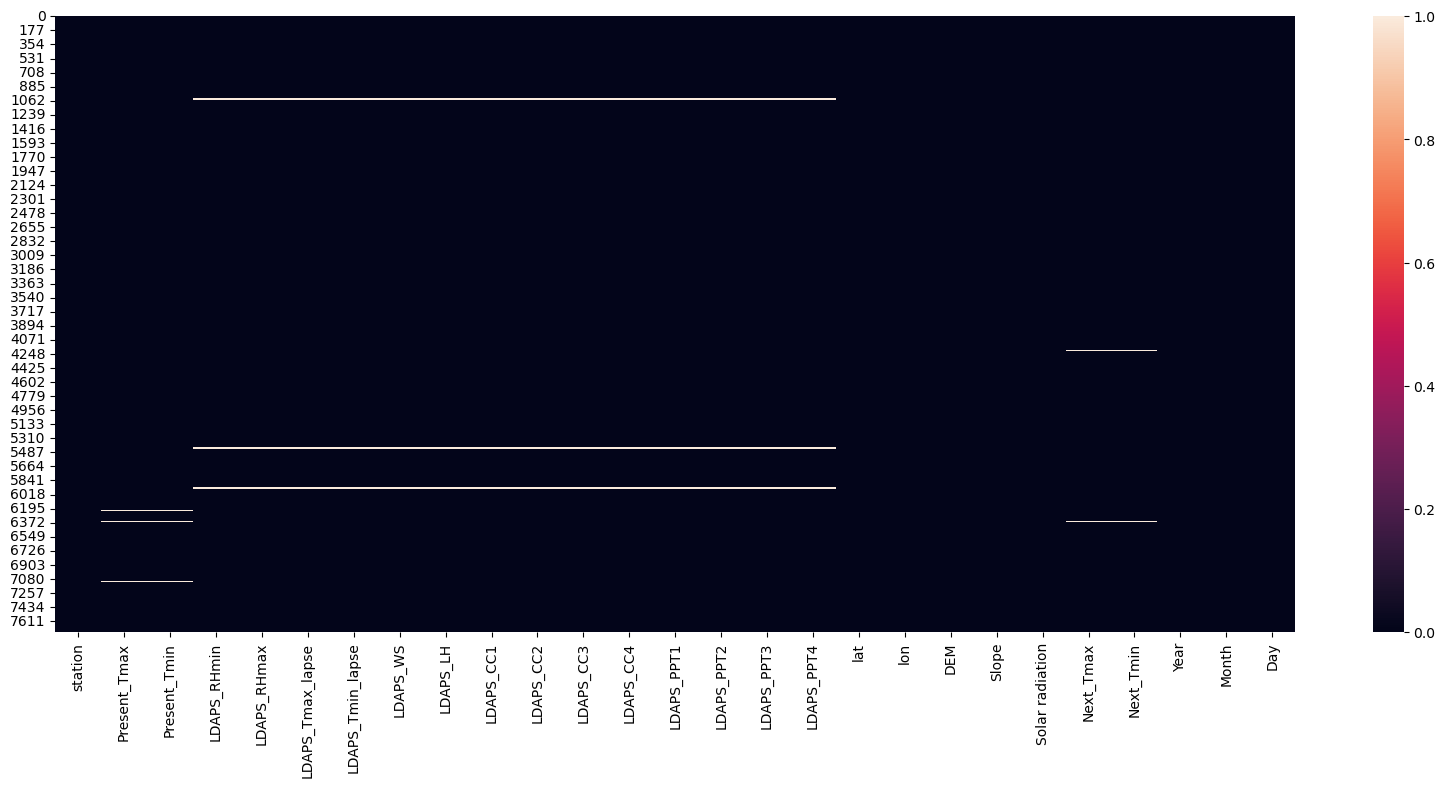

In [13]:
#checking the null values by using the heatmap
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize= (20,8))
sns.heatmap(df.isnull())

we can see clearly observe that the white lines in the heatmap which indicates the missing values.

In [14]:
#dropping  all the null values
df = df.dropna()

In [15]:
#checking the null values ater dropping 
df.isnull().sum()

station             0
Present_Tmax        0
Present_Tmin        0
LDAPS_RHmin         0
LDAPS_RHmax         0
LDAPS_Tmax_lapse    0
LDAPS_Tmin_lapse    0
LDAPS_WS            0
LDAPS_LH            0
LDAPS_CC1           0
LDAPS_CC2           0
LDAPS_CC3           0
LDAPS_CC4           0
LDAPS_PPT1          0
LDAPS_PPT2          0
LDAPS_PPT3          0
LDAPS_PPT4          0
lat                 0
lon                 0
DEM                 0
Slope               0
Solar radiation     0
Next_Tmax           0
Next_Tmin           0
Year                0
Month               0
Day                 0
dtype: int64

We can see that all the null values present in our dataset has been removed

<AxesSubplot:>

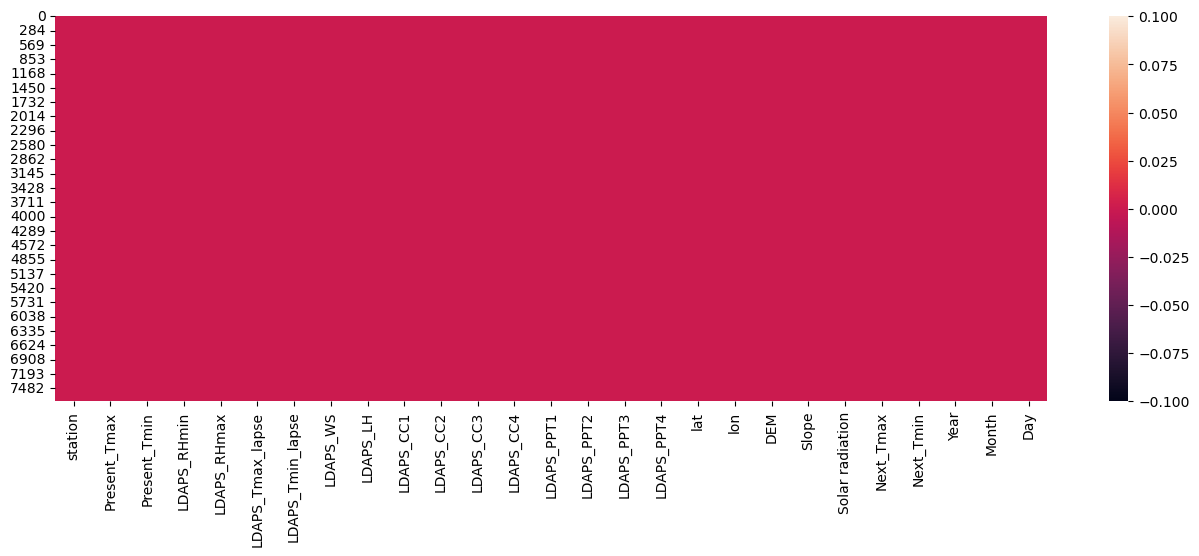

In [16]:
#checking the null values using heatmap
plt.figure(figsize =(16,5))
sns.heatmap(df.isnull())

## Checking Correlation

<AxesSubplot:>

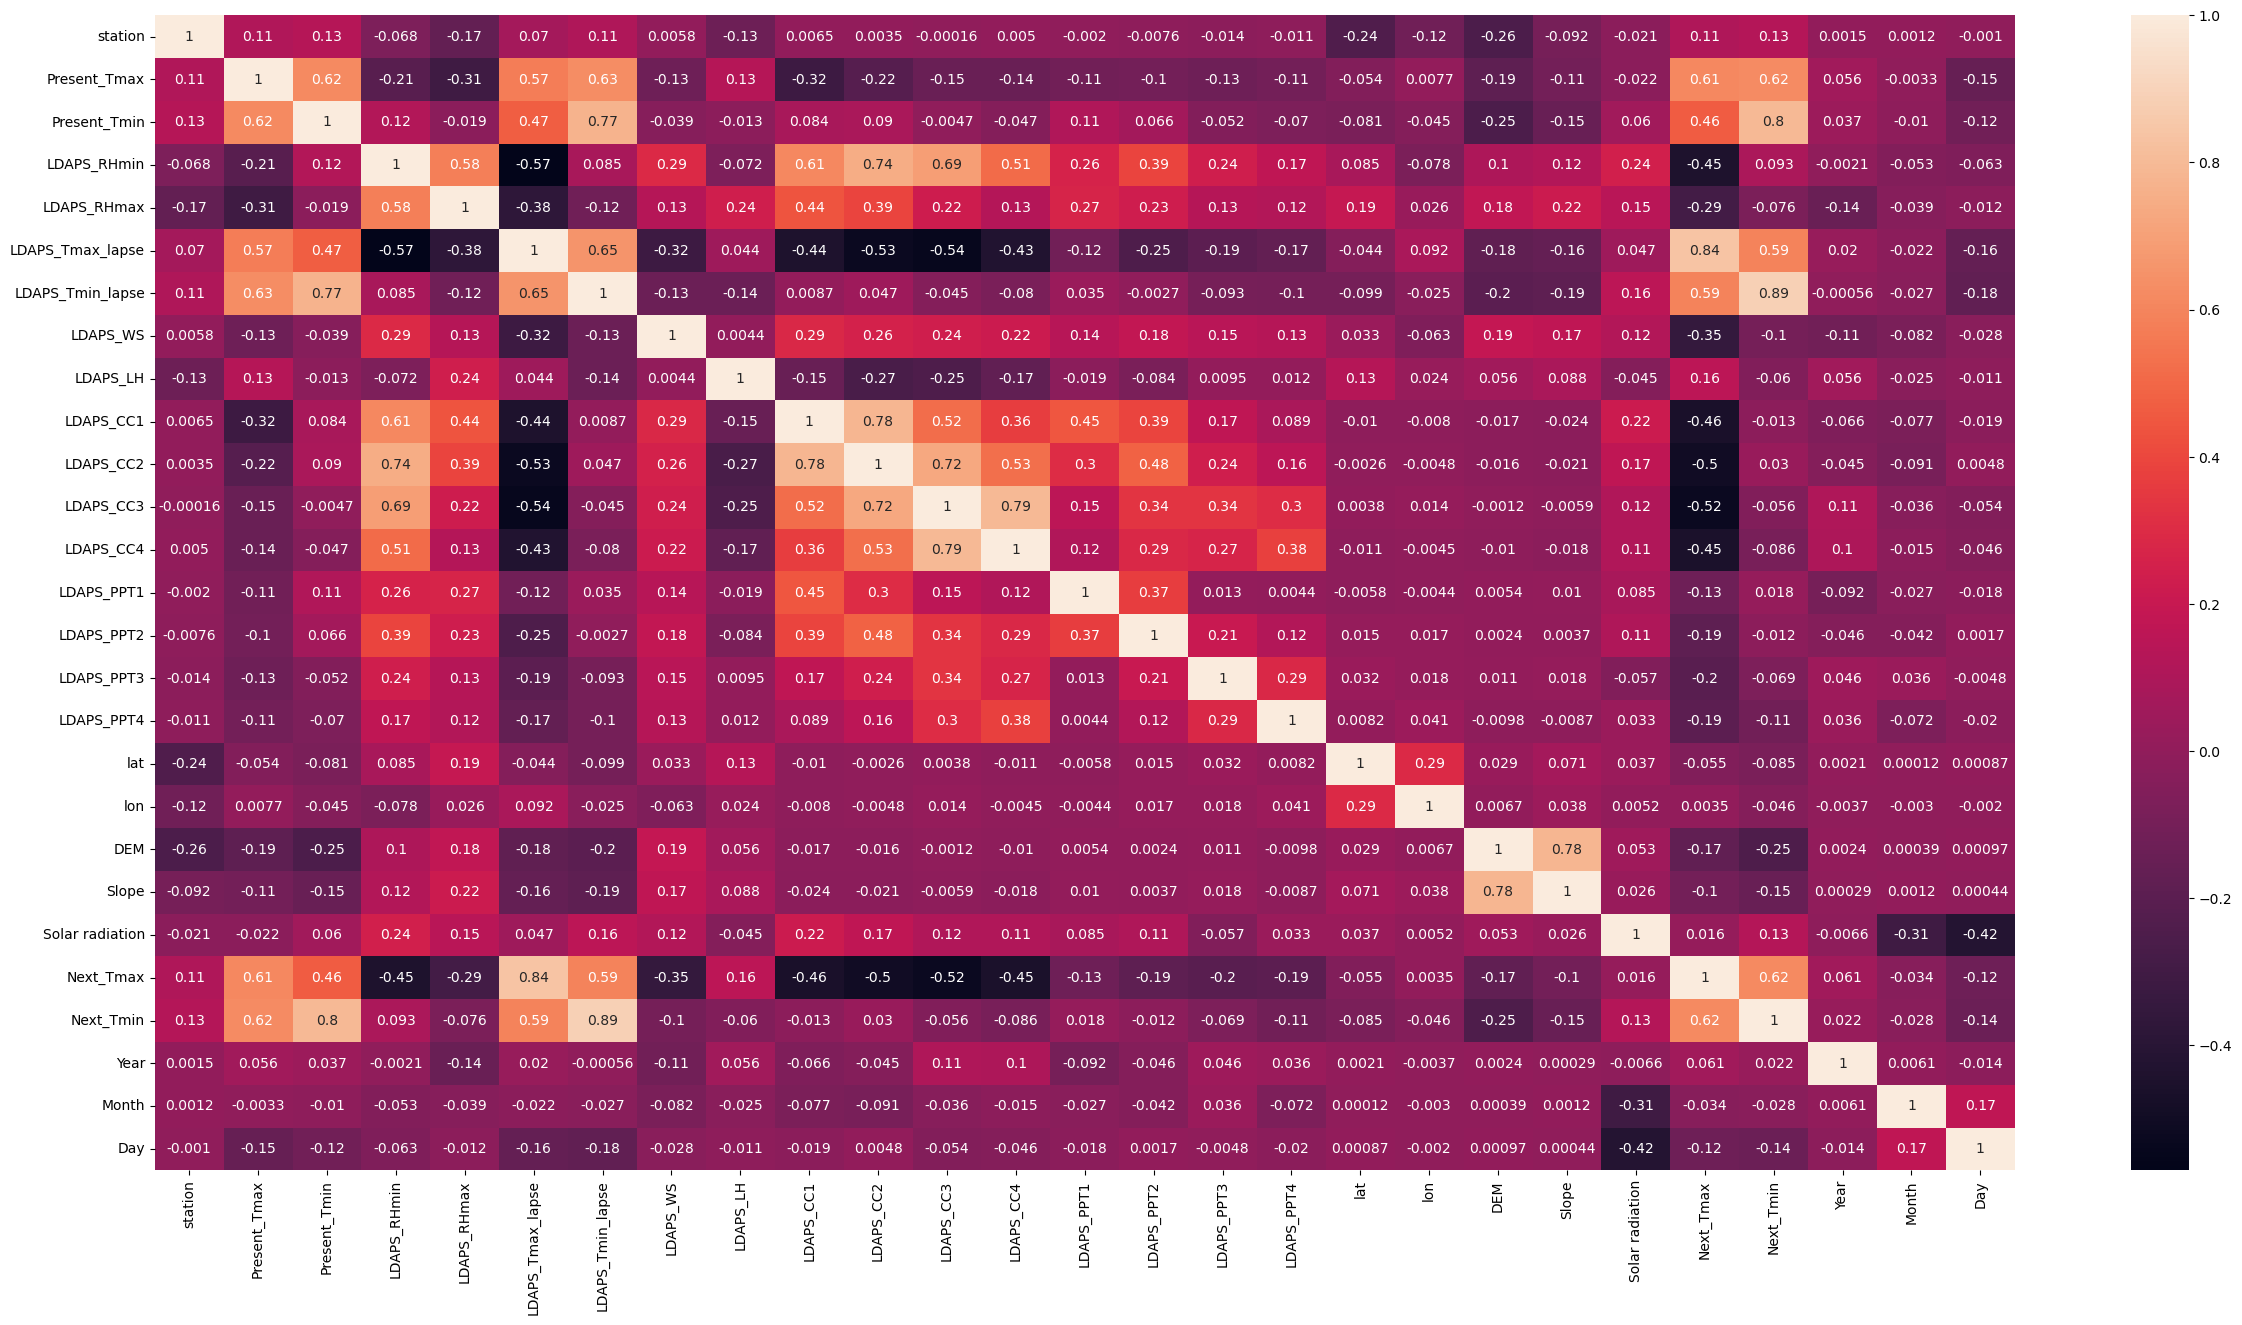

In [17]:
plt.figure(figsize = (30,15))
sns.heatmap(df.corr(), annot=True)

We can see here Present_Tmax and Present_Tmin are highly correlated with Target variables, LDAPS_RHmin and LDAPS_RHmax are also highly correlated with target variables, Next_Tmin and Next_Tmax are also highly correlated with exch other, most of the columns are negatively correlated with target variables.

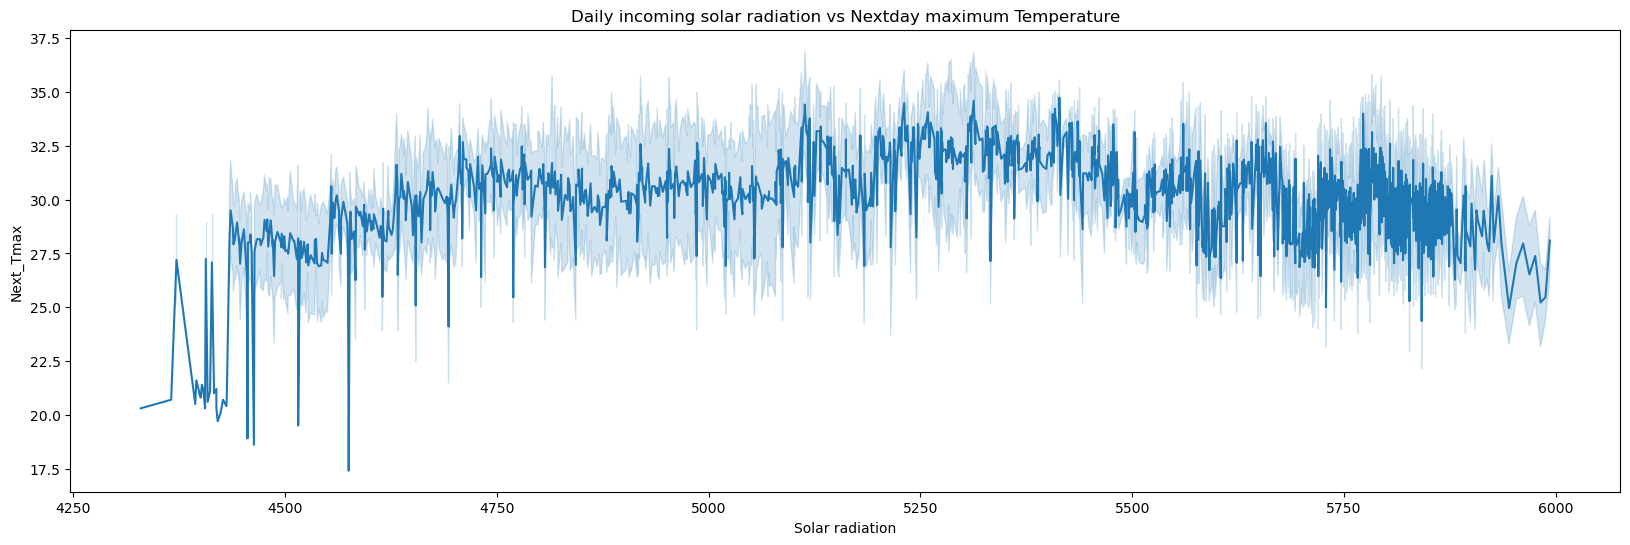

In [18]:
# comparing between Daily incoming solar radiation VS Next day maximum Temperature
plt.figure(figsize=(20,6))
plt.title('Daily incoming solar radiation vs Nextday maximum Temperature')
sns.lineplot(x='Solar radiation',y='Next_Tmax',data=df)
plt.show()

here we can see that the next day maximum temperature is frequently increases.

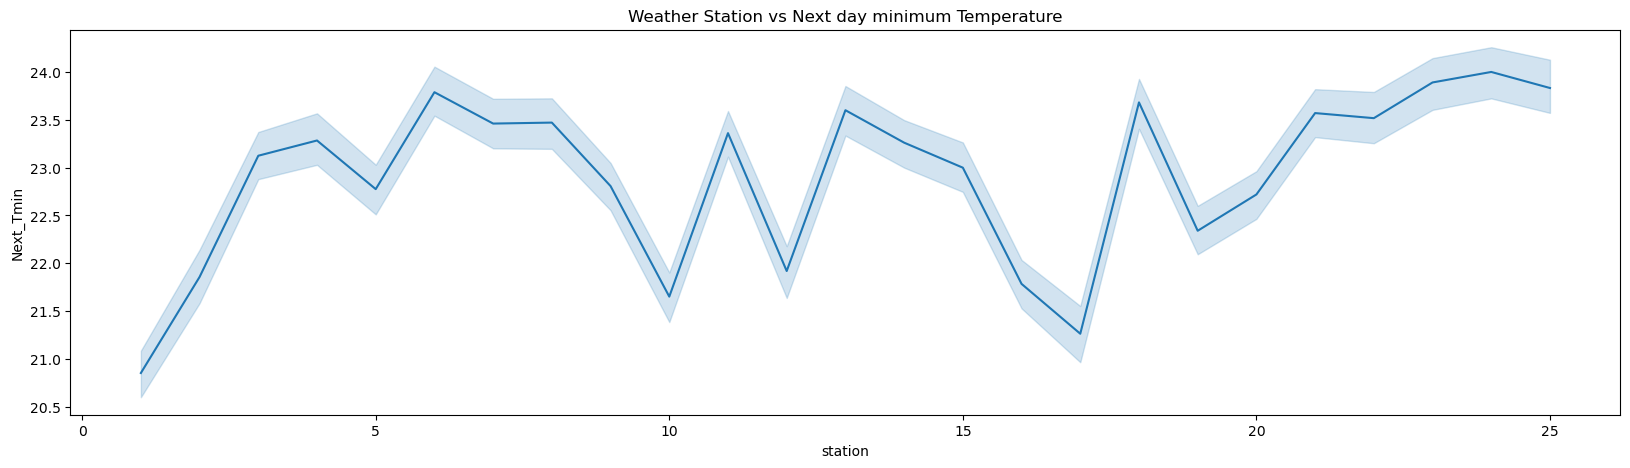

In [19]:
# comparing between weather station vs next day minimum Temperature
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day minimum Temperature')
sns.lineplot(x='station',y='Next_Tmin',data=df)
plt.show()

here, we can see that,the line plot clears that next day minimum temparature is high & low at station 18 & 17 respectively.

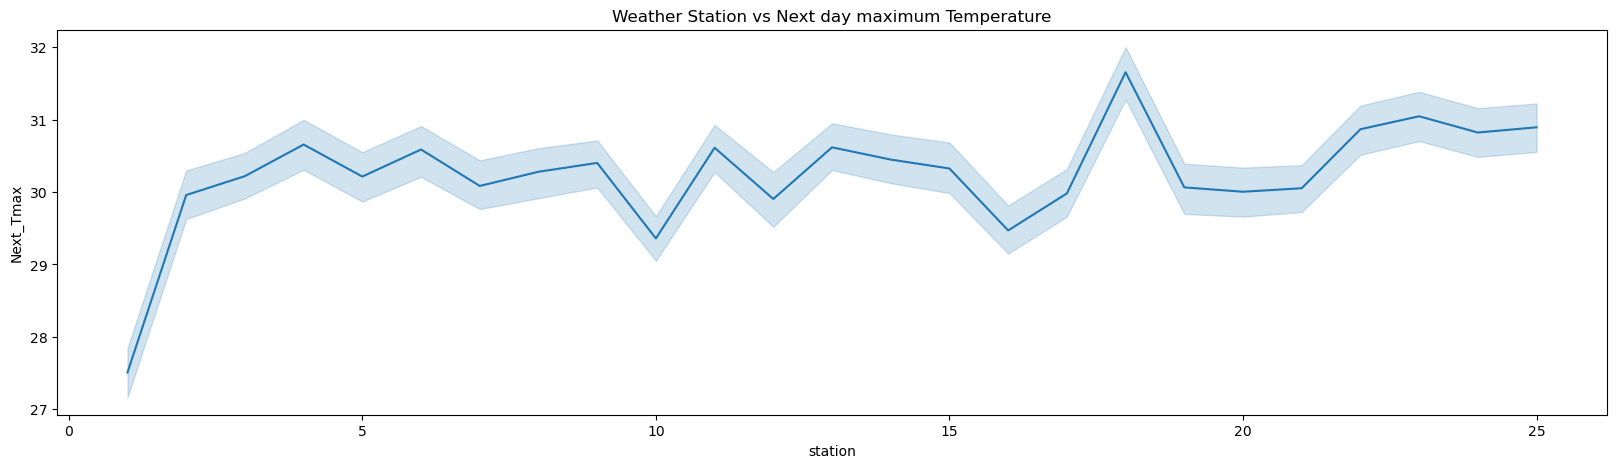

In [20]:
# comparing between weather station and next day maximum temperature
plt.figure(figsize=(20,5))
plt.title('Weather Station vs Next day maximum Temperature')
sns.lineplot(x='station',y='Next_Tmax',data=df)
plt.show()

here, we can see that,the line plot clears that next day maximum temparature is high & low at station 18 & 10 respectively.

Text(0, 0.5, 'Next_Tmax')

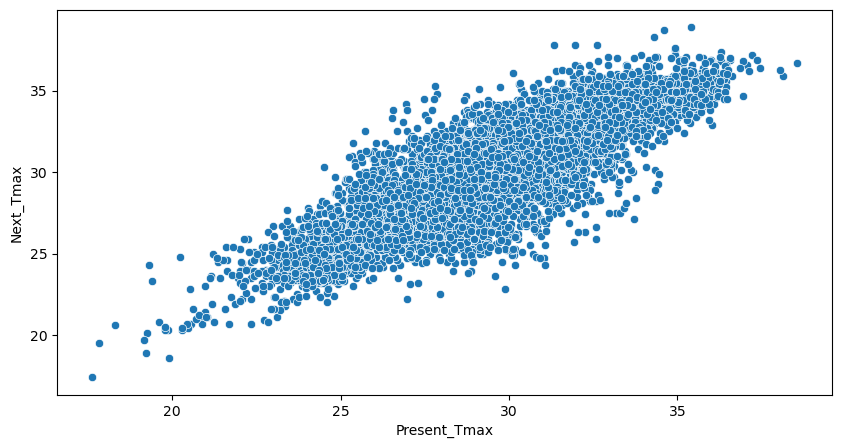

In [21]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['LDAPS_Tmax_lapse'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

as we can see that with LDAPS_Tmax lapse temperature is also getting higher like in linear format pattern.

Text(0, 0.5, 'Next_Tmin')

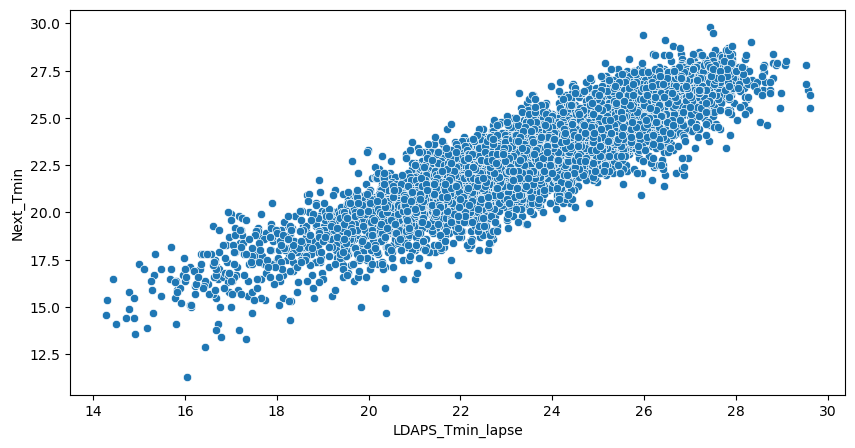

In [22]:
plt.figure(figsize=(10,5))
sns.scatterplot(df['LDAPS_Tmin_lapse'],df['Next_Tmin'])
plt.xlabel('LDAPS_Tmin_lapse')
plt.ylabel('Next_Tmin')

we can see here with LDAPS_Tmin_lapse temp is also getting lower.

Text(0, 0.5, 'Next_Tmin')

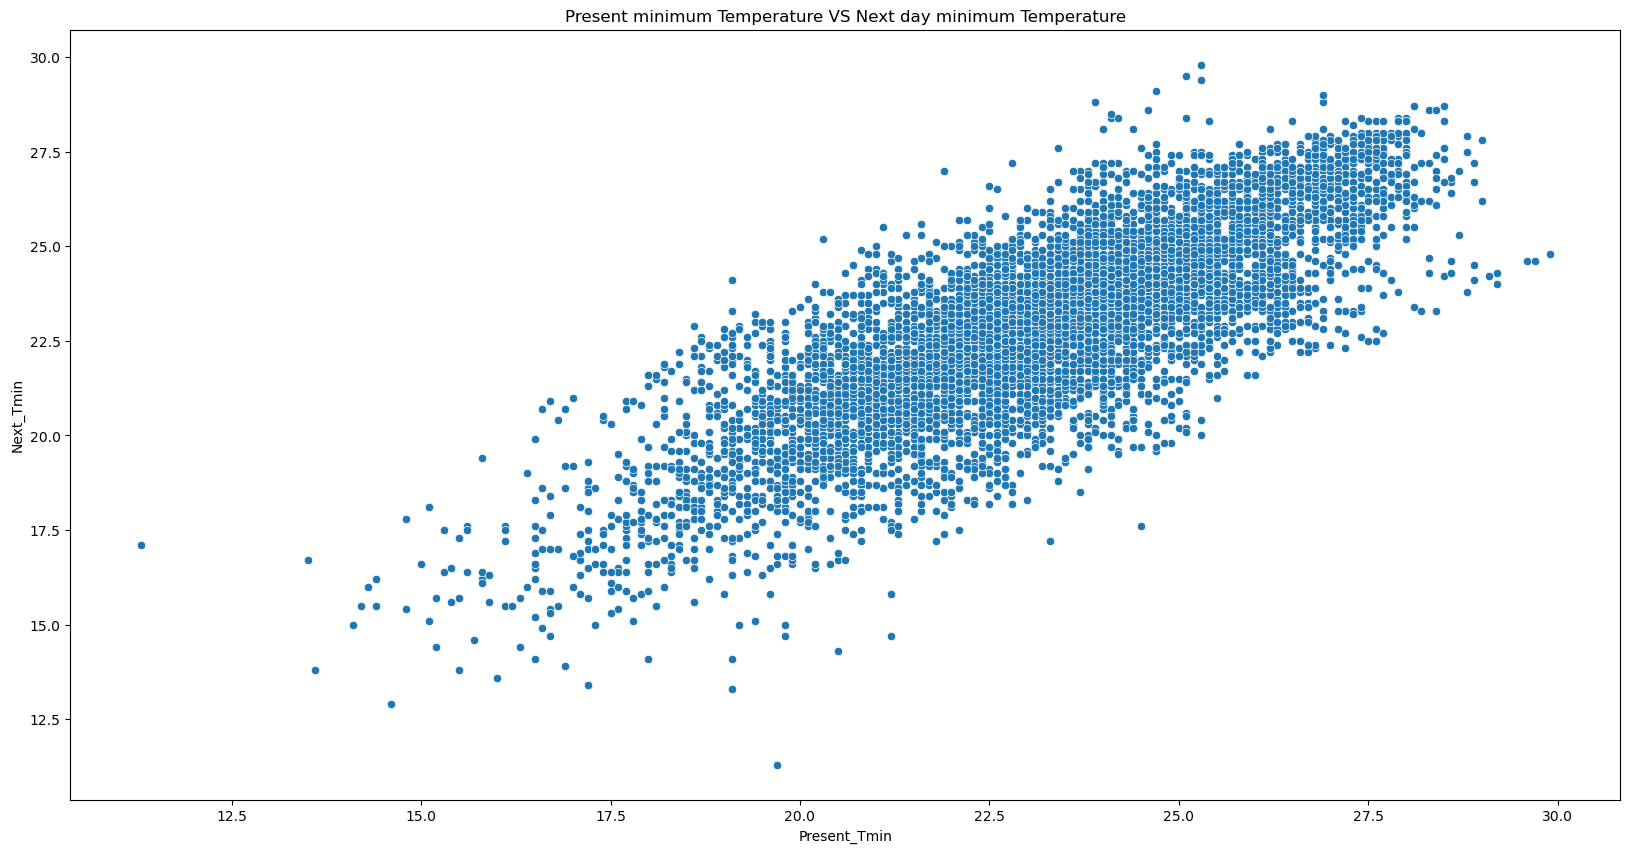

In [23]:
#Distribution data between Present minimun Temperature  vs Next day minimum Temperature.
plt.figure(figsize=(20,10))
plt.title('Present minimum Temperature VS Next day minimum Temperature')
sns.scatterplot(df['Present_Tmin'], df['Next_Tmin'])
plt.xlabel('Present_Tmin')
plt.ylabel('Next_Tmin')

here we can notice that when present _tmin is decreasing ,next_tmin also getting lower.

Text(0, 0.5, 'Next_Tmax')

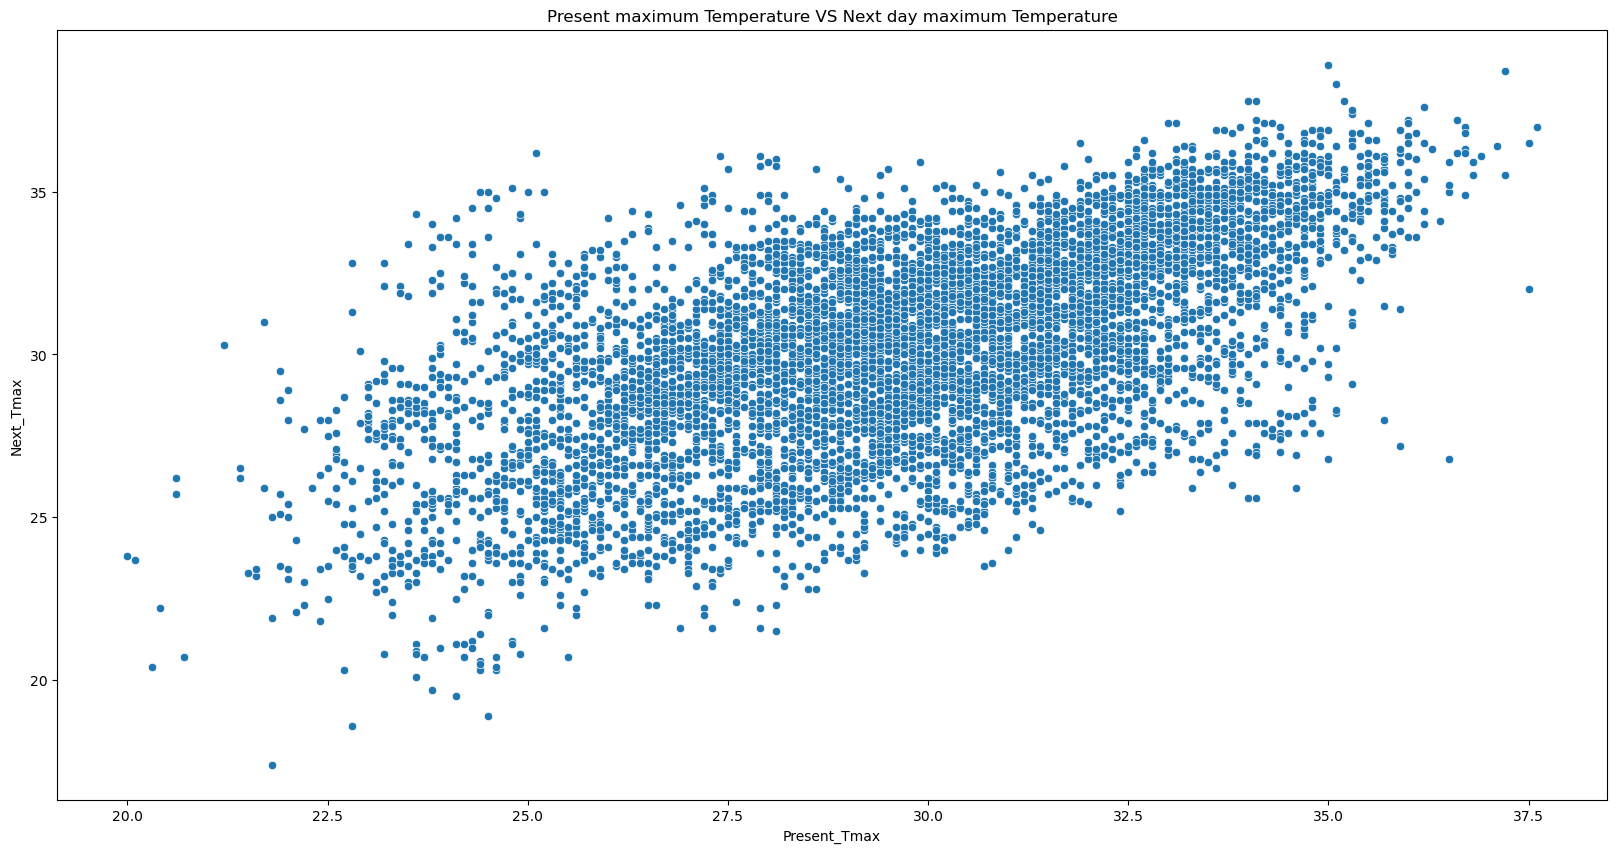

In [24]:
#Distribution data between Present maximum temperaturevs Next day maximum Temperature
plt.figure(figsize=(20,10))
plt.title('Present maximum Temperature VS Next day maximum Temperature')
sns.scatterplot(df['Present_Tmax'], df['Next_Tmax'])
plt.xlabel('Present_Tmax')
plt.ylabel('Next_Tmax')

here we can see that when present_tmax is increasing,next_tax is also is getting higher and it looks like linear pattern.

<AxesSubplot:title={'center':'Next day maximum Temperature'}, xlabel='Next_Tmax', ylabel='Density'>

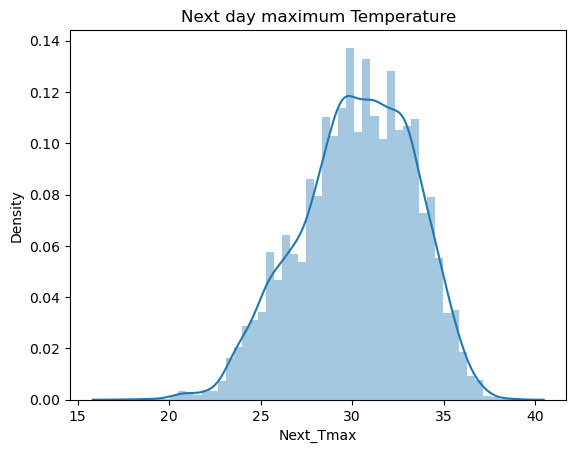

In [25]:
plt.title('Next day maximum Temperature')
sns.distplot(df['Next_Tmax'],kde=True)

The distribution plot clears that next day maximum temperature distribution is lies between 22 to 37.

<AxesSubplot:title={'center':'Next day minimum Temperature'}, xlabel='Next_Tmin', ylabel='Density'>

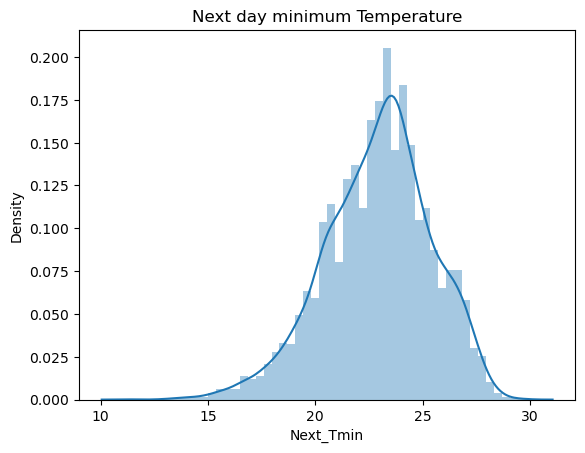

In [26]:
plt.title('Next day minimum Temperature')
sns.distplot(df['Next_Tmin'],kde=True)

In these plot we can see that distplot clears that next day minimum temperature distribution is lies bewteen 15 to 28.

## Removing outliers

In [27]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(7588, 27)

In [28]:
threshold=3
print(np.where(z>3))

(array([  25,   25,   26, ..., 7581, 7582, 7582]), array([ 7, 14, 14, ...,  2,  2,  6]))


In [29]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(7588, 27)
(6739, 27)


In [30]:
#Percent Data Loss
loss_percent=((7588-6739)/7588)*100
loss_percent

11.188719030047443

We see that percentage data loss is very high i.e 11% so we will not remove outliers

## Skewness

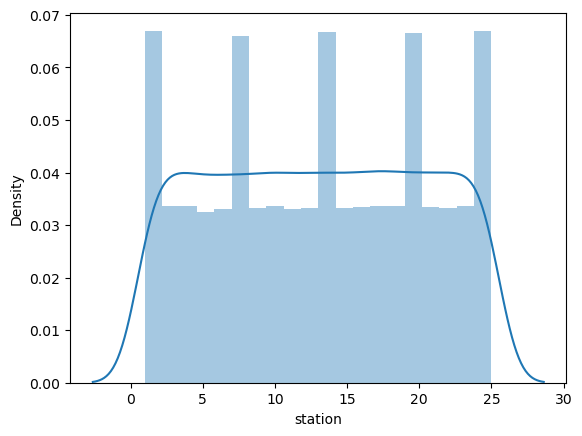

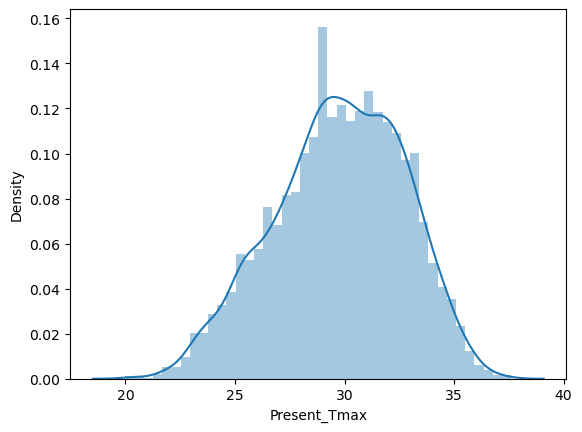

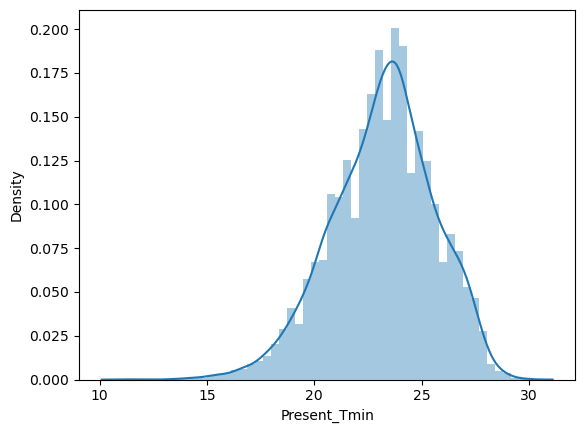

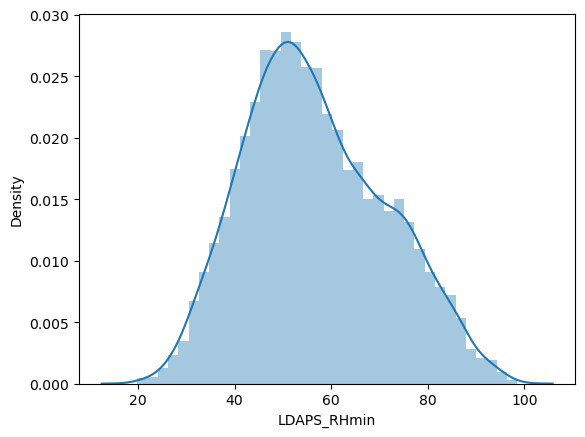

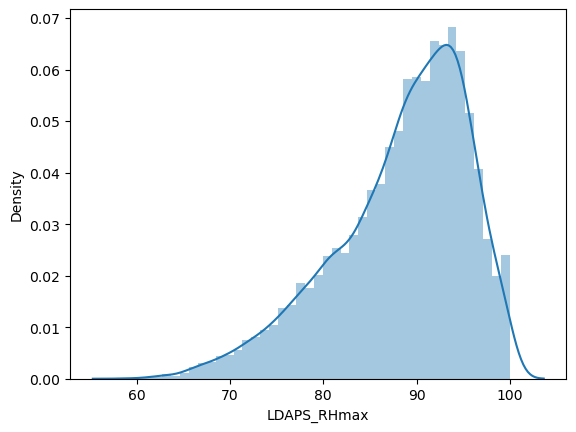

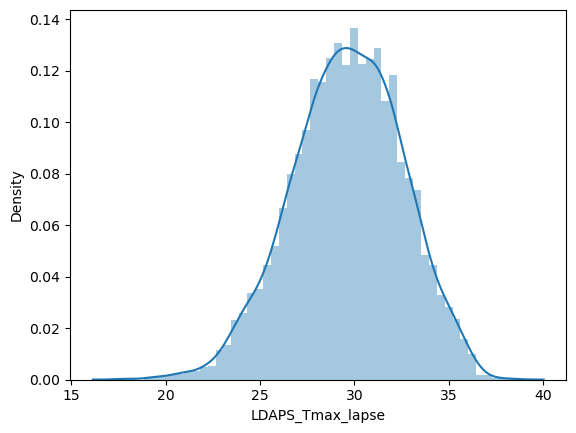

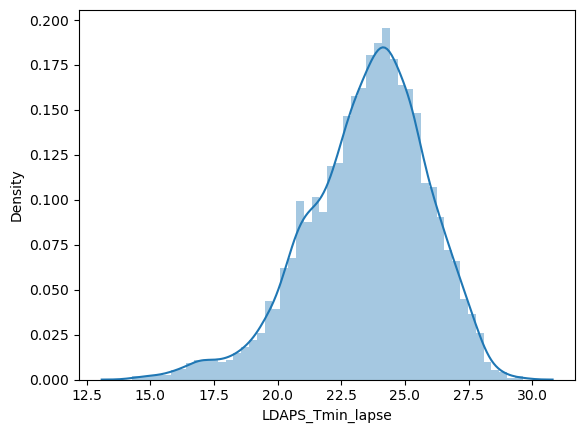

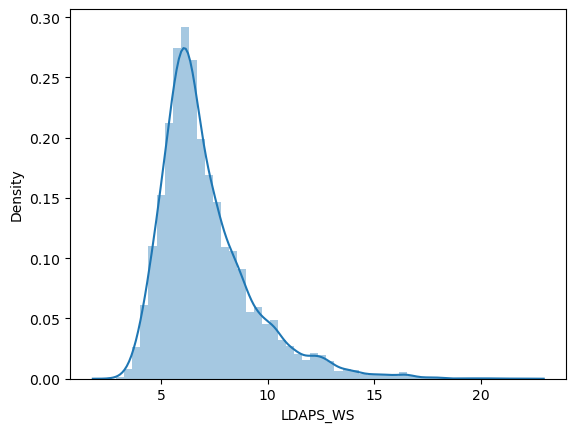

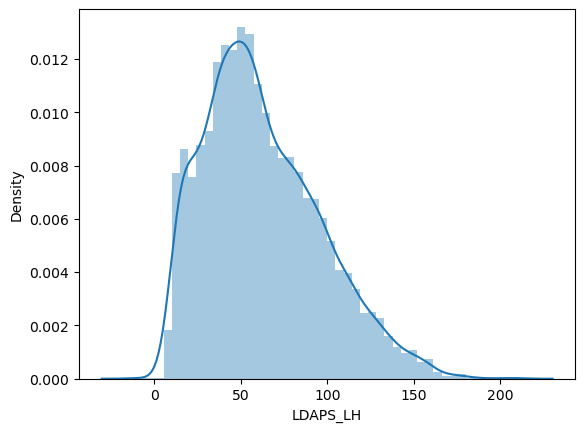

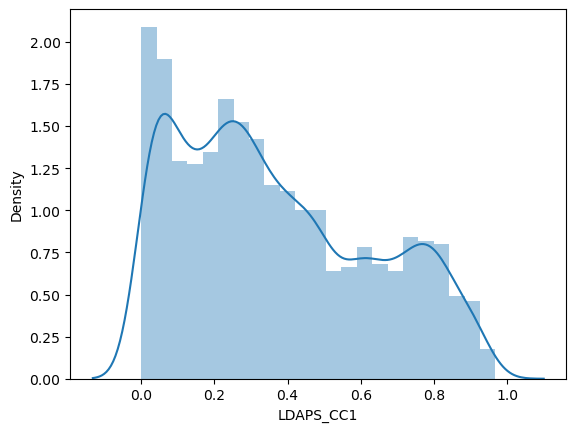

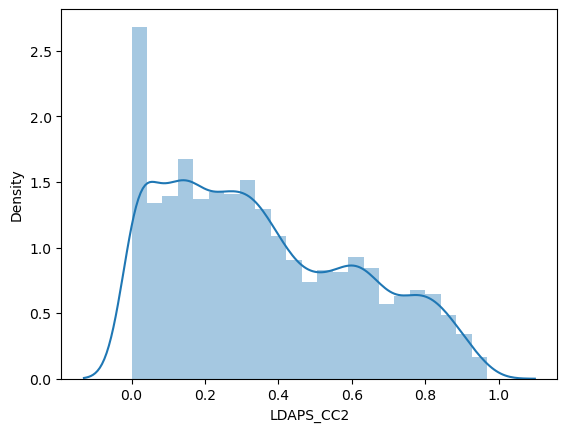

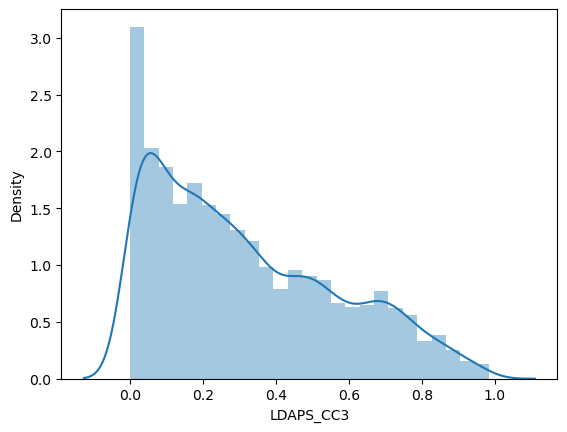

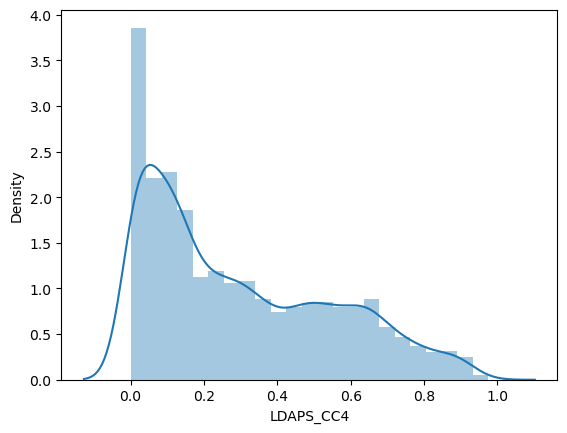

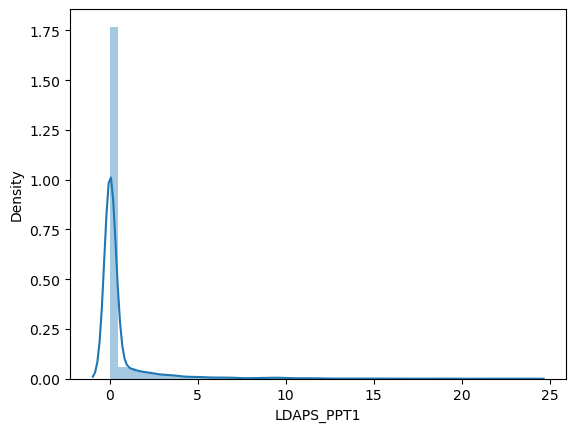

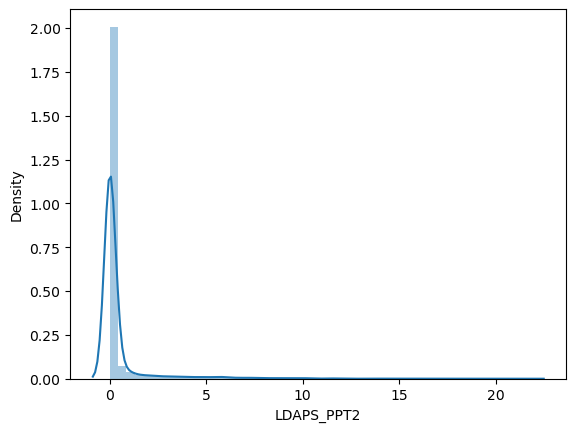

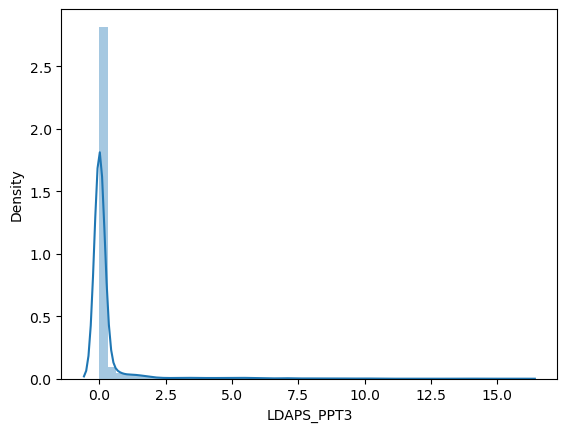

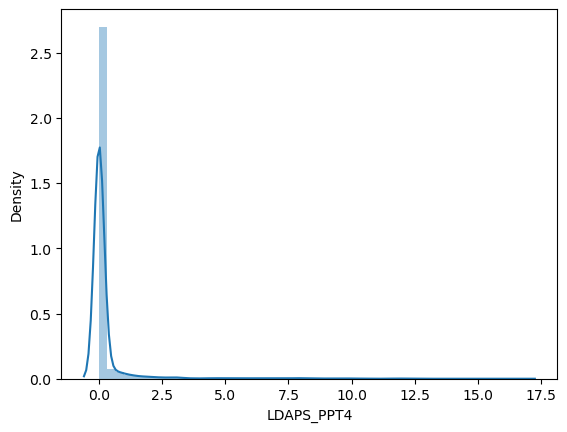

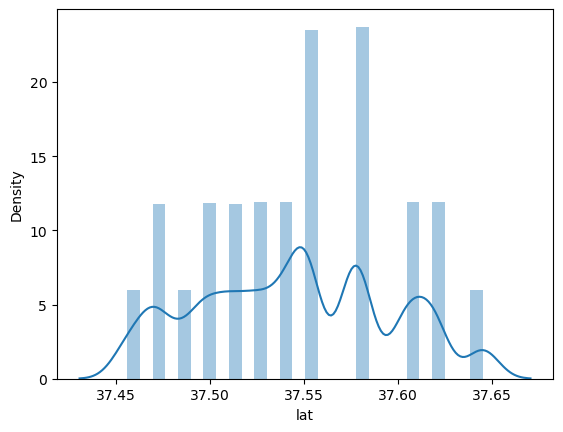

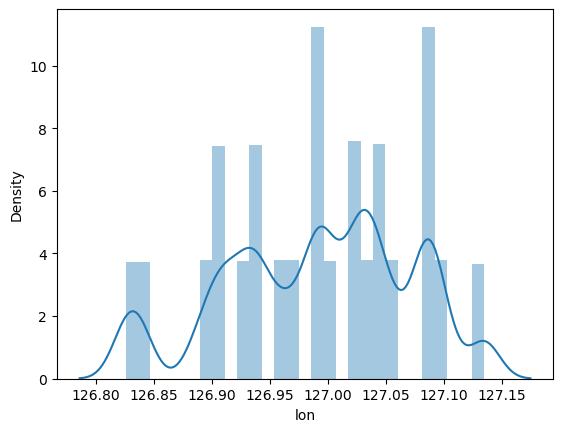

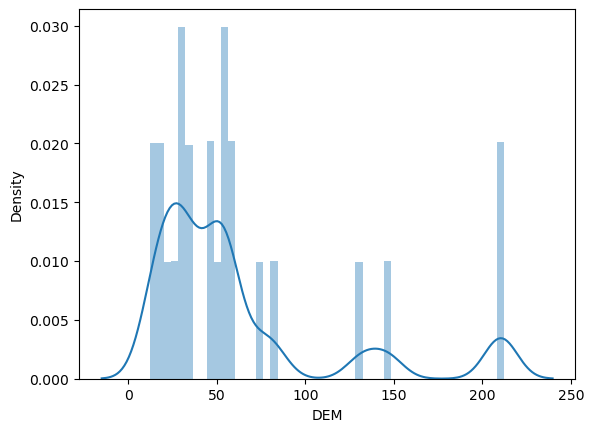

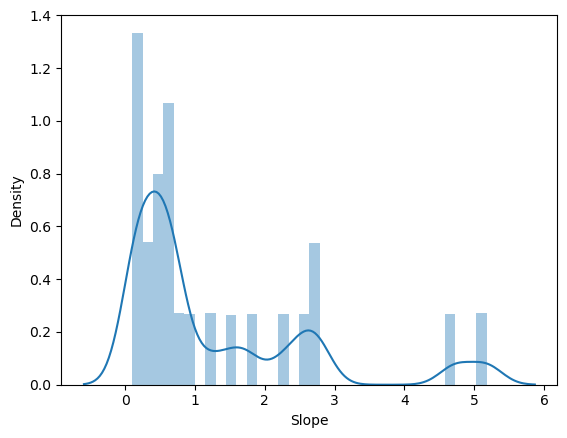

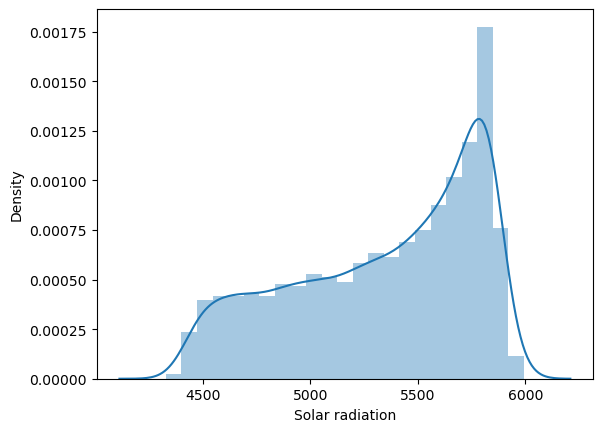

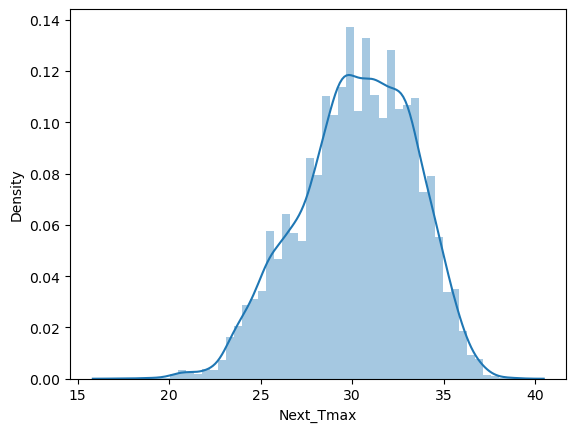

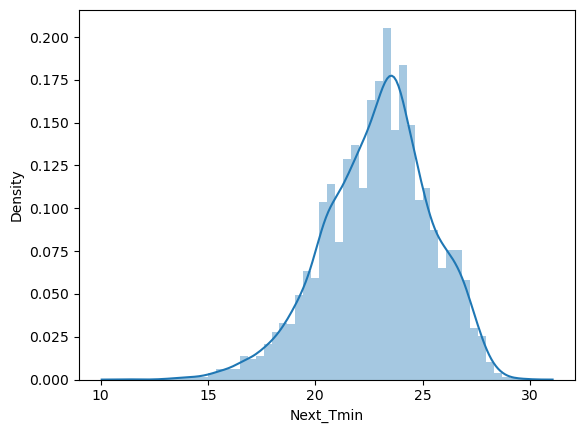

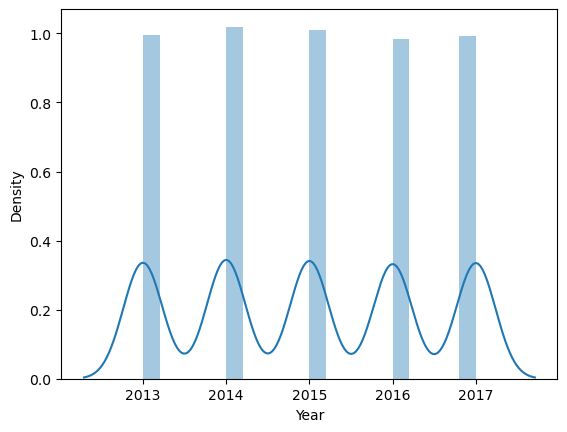

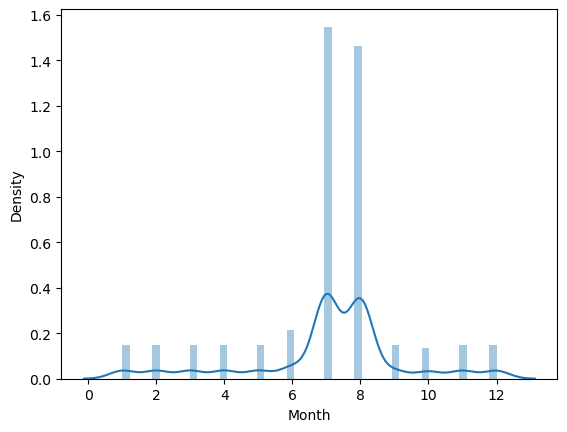

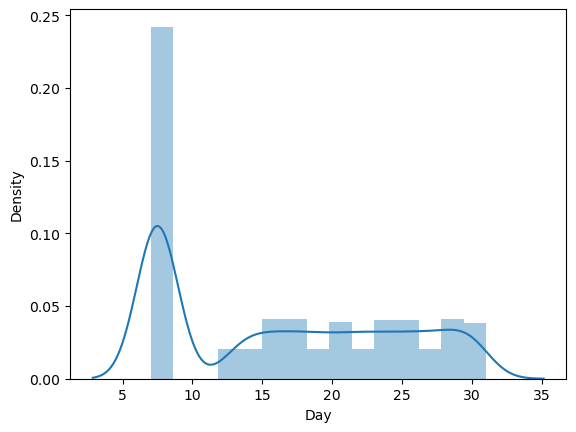

In [31]:
for i in df: 
    sns.distplot(df[i], kde = True)
    plt.show()

In [32]:
df.skew()

station            -0.004178
Present_Tmax       -0.257069
Present_Tmin       -0.353822
LDAPS_RHmin         0.301396
LDAPS_RHmax        -0.845264
LDAPS_Tmax_lapse   -0.222349
LDAPS_Tmin_lapse   -0.574035
LDAPS_WS            1.553926
LDAPS_LH            0.662971
LDAPS_CC1           0.456716
LDAPS_CC2           0.473929
LDAPS_CC3           0.639649
LDAPS_CC4           0.663815
LDAPS_PPT1          5.305906
LDAPS_PPT2          5.710360
LDAPS_PPT3          6.356670
LDAPS_PPT4          6.681256
lat                 0.085377
lon                -0.289048
DEM                 1.721617
Slope               1.559050
Solar radiation    -0.524325
Next_Tmax          -0.334842
Next_Tmin          -0.393662
Year                0.013575
Month              -0.703092
Day                 0.245563
dtype: float64

skewness more than +/-0.5 will we treated.

In [33]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df)

In [34]:
type(df_new)

numpy.ndarray

In [35]:
df=pd.DataFrame(df_new,columns=df.columns)

In [37]:
df.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.000000
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.039960
Next_Tmin          -0.016081
Year                0.000000
Month               0.043710
Day                -0.041461
dtype: float64

As we can see the skewness has been removed

## Dividing data into X and Y
separating both variables into different part

In [38]:
y1 = df["Next_Tmax"]
y2 = df["Next_Tmin"]
x = df.drop(["Next_Tmax","Next_Tmin"], axis=1)

## Scaling data

In [42]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
x=sc.fit_transform(x)

In [43]:
pd.DataFrame(x).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
dtype: int64

data have been scalled.

## Model Building

### Next_Tmax

In [44]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge 
from sklearn.svm import SVR

In [46]:
#Checking the Best Random State for Data Split
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y1_train,y1_test = train_test_split(x,y1,test_size=.30,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y1_train)
    predrf = LR.predict(x_test)
    score = r2_score(y1_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.7967522346843777  on Random_state  777


In [47]:
# splitting data 
x_train,x_test,y1_train,y1_test=train_test_split(x,y1,test_size=.30,random_state=maxRS)

In [48]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print('accuracy score of :', m)
    m.fit(x_train,y1_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y1_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y1_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y1_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y1_test,pred)))
    score=cross_val_score(m,x,y1,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is :  ",r2_score(y1_test,pred)-abs(score.mean()))
    print("===============================================================================")

accuracy score of : LinearRegression()
R2 Score:                 0.7967522346843777
Mean Absolute Error:      0.34985073013804324
Mean Squared error:       0.21040946873590782
Root Mean Squared Error:  0.458704118943691
[0.59156483 0.66583999 0.62330433 0.66926739 0.71746433 0.72614468
 0.79764377 0.72737087]
cross validation score:   0.6898250230120345
Difference between R2 score and cross validatio score is :   0.1069272116723432
accuracy score of : RandomForestRegressor()
R2 Score:                 0.9069389588924003
Mean Absolute Error:      0.23053241948151115
Mean Squared error:       0.09634016978761573
Root Mean Squared Error:  0.31038712890133785
[0.62096148 0.6993896  0.61446739 0.6393345  0.72495694 0.70047341
 0.80094627 0.70643692]
cross validation score:   0.688370813764851
Difference between R2 score and cross validatio score is :   0.2185681451275493
accuracy score of : DecisionTreeRegressor()
R2 Score:                 0.7655871798424282
Mean Absolute Error:      0.34855

## Hyper Parameter Tuning

### with Random Forest for Next_Tmax

In [60]:
from sklearn.model_selection import GridSearchCV
# Hyper Parameter Tuning for RandomForestRegresser
#Creating parameter list to be passed in GridSearchCV
parameters = {
    'n_estimators':[50,80],
    'max_features':['auto','log2'],
    'max_depth':[40,50]
 
}     

GCV=GridSearchCV(estimator=RandomForestRegressor(),
                param_grid=parameters,
                cv=20,
                scoring='accuracy')

In [61]:
GCV.fit(x_train,y1_train)

GridSearchCV(cv=20, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 80]},
             scoring='accuracy')

In [62]:
GCV.best_params_

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 50}

In [65]:
# Checking score with best parameter
final_model=RandomForestRegressor(max_depth=50,max_features='auto',n_estimators=100)
final_model.fit(x_train,y1_train)
predfinal=final_model.predict(x_test)
print('Final Accuracy is with Random Forest Regressor = ',r2_score(y1_test,predfinal))

Final Accuracy is with Random Forest Regressor =  0.9087482480406741


our model learnt almost 90% for Next_Tmax

## Saving the model

In [73]:
import pickle
filename = 'Temperature_Tmax.pkl'
pickle.dump(RandomForestRegressor,open(filename,'wb'))

## With Next_Tmin

In [81]:
maxR2_Score=0
maxRS=0
for i in range(1,1000):
    x_train,x_test,y2_train,y2_test = train_test_split(x,y2,test_size=.25,random_state=i)
    LR = LinearRegression()
    LR.fit(x_train, y2_train)
    predrf = LR.predict(x_test)
    score = r2_score(y2_test, predrf)
    if score>maxR2_Score:
        maxR2_Score=score
        maxRS=i
print("Best accuracy is",maxR2_Score," on Random_state ",maxRS)

Best accuracy is 0.8542847507575996  on Random_state  103


In [82]:
# splitting data 
x_train,x_test,y2_train,y2_test=train_test_split(x,y2,test_size=.25,random_state=maxRS)

In [83]:
model=[LinearRegression(),RandomForestRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),GradientBoostingRegressor(),Ridge(),SVR()]
for m in model:
    print("*******************************************************************************")
    print("===============================================================================")
    print('accuracy score of ->', m)
    m.fit(x_train,y2_train)
    pred = m.predict(x_test)
    print("R2 Score:                ", r2_score(y2_test,pred))
    print("Mean Absolute Error:     ", mean_absolute_error(y2_test,pred))
    print("Mean Squared error:      ", mean_squared_error(y2_test,pred))
    print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y2_test,pred)))
    score=cross_val_score(m,x,y2,cv=8)
    print(score)
    print("cross validation score:  ",score.mean())
    print("Difference between R2 score and cross validatio score is - ",r2_score(y2_test,pred)-abs(score.mean()))
    print("===============================================================================")

*******************************************************************************
accuracy score of -> LinearRegression()
R2 Score:                 0.8542847507575996
Mean Absolute Error:      0.30376506649717694
Mean Squared error:       0.15016323952281693
Root Mean Squared Error:  0.38750901863416926
[0.52846123 0.83191388 0.63868603 0.79154529 0.81245207 0.7922877
 0.86449858 0.87602324]
cross validation score:   0.7669835013941142
Difference between R2 score and cross validatio score is -  0.08730124936348538
*******************************************************************************
accuracy score of -> RandomForestRegressor()
R2 Score:                 0.9194584863941391
Mean Absolute Error:      0.22277425001838363
Mean Squared error:       0.08300006116043394
Root Mean Squared Error:  0.2880973119632218
[0.49693988 0.80068305 0.66470359 0.79594877 0.80669546 0.7899823
 0.8682173  0.88403859]
cross validation score:   0.7634011168644944
Difference between R2 score and cross va

## Hyper Parameter Tuning

### with Random Forest for Next_Tmin

In [84]:
from sklearn.model_selection import GridSearchCV
# Hyper Parameter Tuning for RandomForestRegresser
#Creating parameter list to be passed in GridSearchCV
parameters = {
    'n_estimators':[50,80],
    'max_features':['auto','log2'],
    'max_depth':[40,50]
 
}     

GCV=GridSearchCV(estimator=RandomForestRegressor(),
                param_grid=parameters,
                cv=20,
                scoring='accuracy')

In [85]:
GCV.fit(x_train,y2_train)

GridSearchCV(cv=20, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [40, 50],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [50, 80]},
             scoring='accuracy')

In [86]:
GCV.best_params_

{'max_depth': 40, 'max_features': 'auto', 'n_estimators': 50}

In [87]:
# Checking score with best parameter
final_model=RandomForestRegressor(max_depth=50,max_features='auto',n_estimators=100)
final_model.fit(x_train,y2_train)
predfinal=final_model.predict(x_test)
print('Final Accuracy is with Random Forest Regressor = ',r2_score(y2_test,predfinal))

Final Accuracy is with Random Forest Regressor =  0.9182512467537102


In [88]:
import pickle
filename = 'Temperature_Tmin.pkl'
pickle.dump(RandomForestRegressor,open(filename,'wb'))